In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import KeyFunctions as me

In [2]:

df = pd.read_excel('Tables and Figures/Hyper Param Scores.xlsx', sheet_name = 0)
df['Dataset'] = pd.Series(df.iloc[:, 0]).fillna(method='ffill')
df['RF Bot'] = df.loc[:, 'RF Avg'] - df.loc[:, 'RF STD'] 
df['SV Bot'] = df.loc[:, 'SV Avg'] - df.loc[:, 'SV STD'] 
df['KNN Bot'] = df.loc[:, 'KNN Avg'] - df.loc[:, 'KNN STD'] 
df['RF Top'] = df.loc[:, 'RF Avg'] + df.loc[:, 'RF STD'] 
df['SV Top'] = df.loc[:, 'SV Avg'] + df.loc[:, 'SV STD']
df['KNN Top'] = df.loc[:, 'KNN Avg'] + df.loc[:, 'KNN STD'] 
df

,Dataset,Transform,RF Avg,RF STD,KNN Avg,KNN STD,SV Avg,SV STD,RF Fit Time,KNN Fit Time,SV Fit Time,RF % Gain,KNN % Gain,SVC % Gain,RF Bot,SV Bot,KNN Bot,RF Top,SV Top,KNN Top
0,R6g Combined,None,0.836257,0.051115,0.805263,0.079982,0.784211,0.071632,0.458419,0.000000,0.000000,0.000000,0.000000,0.000000,0.785142,0.712578,0.725281,0.887373,0.855843,0.885246
1,R6g Combined,Fourier,0.846784,0.082963,0.772515,0.075445,0.847368,0.042509,1.256626,0.000000,0.000000,0.010526,-0.032749,0.063158,0.763821,0.804859,0.697069,0.929746,0.889878,0.847960
2,R6g Combined,Hadamard,0.837427,0.100588,0.783041,0.091430,0.847368,0.042509,0.140614,0.109367,0.086288,0.001170,-0.022222,0.063158,0.736839,0.804859,0.691611,0.938015,0.889878,0.874471
3,R6g via Ouzo Droplet,None,0.790909,0.085667,0.770909,0.092602,0.747273,0.143441,0.066962,0.000000,0.000000,0.000000,0.000000,0.000000,0.705242,0.603832,0.678307,0.876576,0.890713,0.863512
4,R6g via Ouzo Droplet,Fourier,0.861818,0.102755,0.827273,0.120878,0.809091,0.055148,0.048522,0.000000,0.000000,0.070909,0.056364,0.061818,0.759063,0.753943,0.706394,0.964574,0.864239,0.948151
5,R6g via Ouzo Droplet,Hadamard,0.883636,0.071211,0.867273,0.094405,0.849091,0.106422,0.295621,0.000000,0.000000,0.092727,0.096364,0.101818,0.812425,0.742669,0.772867,0.954848,0.955513,0.961678
6,R6g via Silver Nanoparticles,None,0.950000,0.061237,0.900000,0.093541,0.950000,0.100000,0.211373,0.015624,0.000000,0.000000,0.000000,0.000000,0.888763,0.850000,0.806459,1.011237,1.050000,0.993541
7,R6g via Silver Nanoparticles,Fourier,1.000000,0.000000,0.975000,0.050000,1.000000,0.000000,0.219306,0.000000,0.000000,0.050000,0.075000,0.050000,1.000000,1.000000,0.925000,1.000000,1.000000,1.025000
8,R6g via Silver Nanoparticles,Hadamard,1.000000,0.000000,0.975000,0.050000,1.000000,0.000000,0.271416,0.046871,0.046859,0.050000,0.075000,0.050000,1.000000,1.000000,0.925000,1.000000,1.000000,1.025000
9,Triclosan Combined,None,0.747222,0.108119,0.738889,0.161876,0.725000,0.178536,0.082951,0.000000,0.000998,0.000000,0.000000,0.000000,0.639103,0.546464,0.577013,0.855342,0.903536,0.900764


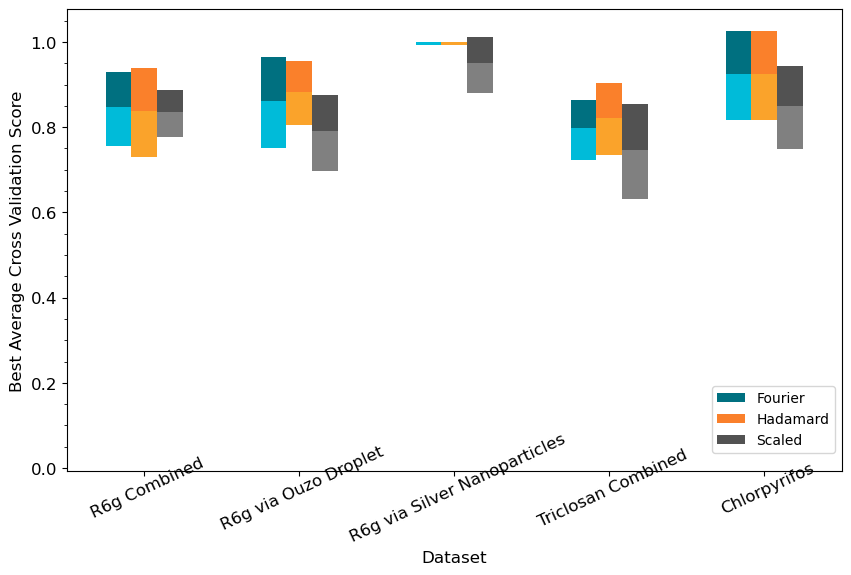

In [3]:
plotting = df.pivot(index = 'Dataset', columns = 'Transform')
fig1, ax = plt.subplots(figsize = [10, 6])

pd.concat([plotting['RF Top'].drop('Chlorpyrifos'), plotting['SV Top']\
           .drop(['R6g Combined', 'R6g via Ouzo Droplet', 'R6g via Silver Nanoparticles', 'Triclosan Combined'])], axis = 0)\
           .plot.bar(ax = ax, color = ['#007080', '#FA802B', '#525252'])
pd.concat([plotting['RF Avg'].drop('Chlorpyrifos'), plotting['SV Avg']\
           .drop(['R6g Combined', 'R6g via Ouzo Droplet', 'R6g via Silver Nanoparticles', 'Triclosan Combined'])], axis = 0)\
           .plot.bar(ax = ax, color = ['#00BBD9', '#FAA32B', '#808080'])
pd.concat([plotting['RF Bot'].drop('Chlorpyrifos'), plotting['SV Bot']\
           .drop(['R6g Combined', 'R6g via Ouzo Droplet', 'R6g via Silver Nanoparticles', 'Triclosan Combined'])], axis = 0)\
           .plot.bar(ax = ax, color = 'w', bottom = -0.0075)

plt.legend(labels = ['Fourier', 'Hadamard','Scaled'], loc='upper right', bbox_to_anchor=(1, 0.2))
plt.xticks(rotation = 25, rotation_mode = 'anchor', fontsize = 'large')
ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
plt.yticks(fontsize = 'large')
plt.ylabel('Best Average Cross Validation Score', fontsize = 'large')
plt.xlabel('Dataset', fontsize = 'large');
plt.savefig("Tables and Figures/SVG Files/Best Case Cross Validation Scores.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures/PNG Files/Best Case Cross Validation Scores.png", format = "png", bbox_inches='tight')

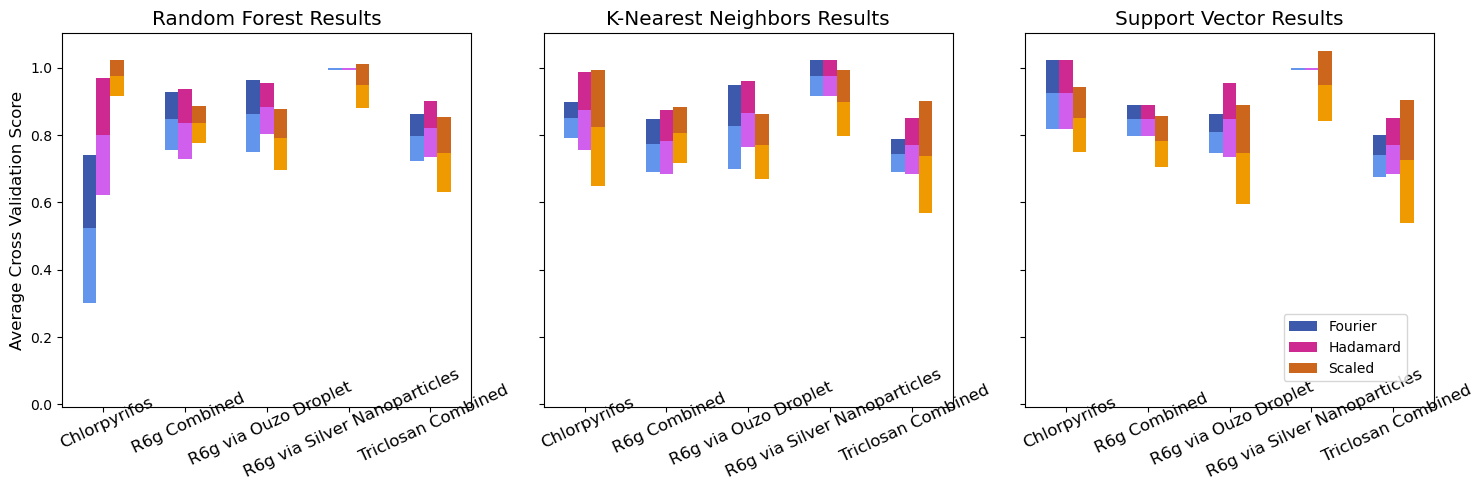

In [4]:
plotting = df.pivot(index = 'Dataset', columns = 'Transform')
fig1, ax = plt.subplots(1, 3, sharey = True, sharex = True, figsize = [15, 5])
labels = plotting.index.to_list()

plotting['RF Top'].plot.bar(ax = ax[0], color = ['#3D59AB', '#CD2990', '#CD661D'])
plotting['RF Avg'].plot.bar(ax = ax[0], color = ['#6495ED', '#D15FEE', '#EE9A00'])
plotting['RF Bot'].plot.bar(ax = ax[0], color = 'w', bottom = -0.0075)
ax[0].set_ylabel('Average Cross Validation Score', fontsize = 'large')
ax[0].set_yticks(ax[0].get_yticks(), fontsize = 'large')
ax[0].set_xticks(ax[0].get_xticks(), labels = labels, rotation = 25, rotation_mode = 'anchor', fontsize = 'large')
ax[0].set_xlabel('')
ax[0].set_title('Random Forest Results', fontsize = 'x-large');

plotting['KNN Top'].plot.bar(ax = ax[1], color = ['#3D59AB', '#CD2990', '#CD661D'])
plotting['KNN Avg'].plot.bar(ax = ax[1], color = ['#6495ED', '#D15FEE', '#EE9A00'])
plotting['KNN Bot'].plot.bar(ax = ax[1], color = 'w', bottom = -0.0075)
ax[1].set_xticks(ax[1].get_xticks(), labels = labels, rotation = 25, rotation_mode = 'anchor', fontsize = 'large')
ax[1].set_xlabel('')
ax[1].set_title('K-Nearest Neighbors Results', fontsize = 'x-large');

plotting['SV Top'].plot.bar(ax = ax[2], color = ['#3D59AB', '#CD2990', '#CD661D'])
plotting['SV Avg'].plot.bar(ax = ax[2], color = ['#6495ED', '#D15FEE', '#EE9A00'])
plotting['SV Bot'].plot.bar(ax = ax[2], color = 'w', bottom = -0.0075)
ax[2].set_xticks(ax[2].get_xticks(), labels = labels, rotation = 25, rotation_mode = 'anchor', fontsize = 'large')
ax[2].set_xlabel('')
ax[2].set_title('Support Vector Results', fontsize = 'x-large');

plt.tight_layout()
ax[0].get_legend().remove()
ax[1].get_legend().remove()
plt.legend(labels = ['Fourier', 'Hadamard','Scaled'], loc='lower right', bbox_to_anchor=(0.95, 0.05))
plt.savefig("Tables and Figures/SVG Files/Complete Validation Scores.svg", format = "svg")

In [5]:
dfnh = pd.read_excel('Tables and Figures/temp.xlsx', sheet_name = 0)
dfnh['Condition'] = pd.Series(dfnh.iloc[:, 0]).fillna(method='ffill')
dfnh['RF Bot'] = dfnh.loc[:, 'RF Avg'] - dfnh.loc[:, 'RF STD'] 
dfnh['SV Bot'] = dfnh.loc[:, 'SV Avg'] - dfnh.loc[:, 'SV STD'] 
dfnh['KNN Bot'] = dfnh.loc[:, 'KNN Avg'] - dfnh.loc[:, 'KNN STD'] 
dfnh['RF Top'] = dfnh.loc[:, 'RF Avg'] + dfnh.loc[:, 'RF STD'] 
dfnh['SV Top'] = dfnh.loc[:, 'SV Avg'] + dfnh.loc[:, 'SV STD']
dfnh['KNN Top'] = dfnh.loc[:, 'KNN Avg'] + dfnh.loc[:, 'KNN STD'] 

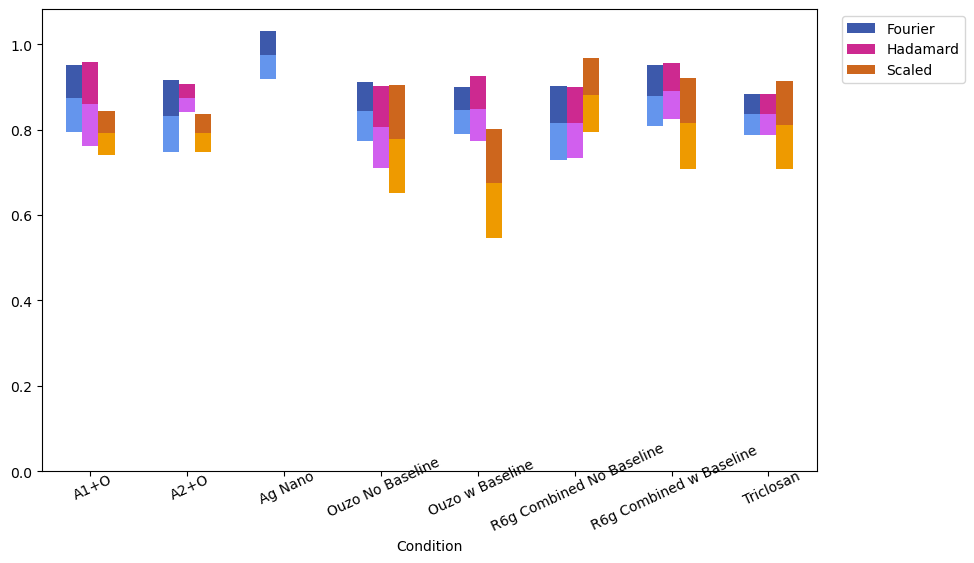

In [6]:
plotting = dfnh.pivot(index = 'Condition', columns = 'Transform')
fig, ax = plt.subplots(figsize = [10, 6])
plotting['RF Top'].plot.bar(ax = ax, color = ['#3D59AB', '#CD2990', '#CD661D'])
plotting['RF Avg'].plot.bar(ax = ax, color = ['#6495ED', '#D15FEE', '#EE9A00'])
plotting['RF Bot'].plot.bar(ax = ax, color = 'w')
plt.legend(labels = ['Fourier', 'Hadamard','Scaled'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation = 25, rotation_mode = 'anchor');

In [7]:
dfCNNAVG = pd.read_excel('Tables and Figures/CNN Results.xlsx', sheet_name = 0)
dfCNNAVG['Dataset'] = pd.Series(dfCNNAVG.iloc[:, 0]).fillna(method='ffill')

mapping = {Dataset: i for i, Dataset in enumerate(dfCNNAVG['Dataset'].unique())}
plAVG = dfCNNAVG.pivot(index = 'Dataset', columns = 'Transform')
copy = plAVG.copy()
plAVG.iloc[0, :] = copy.iloc[1, :]
plAVG.iloc[1, :] = copy.iloc[2, :]
plAVG.iloc[2, :] = copy.iloc[0, :]
plAVG.set_index(keys = pd.Index(['R6g', 'Tric.', 'Chlor.']), inplace = True)
plAVG

Test Acc                      Test Loss                      \
Transform   Fourier  Hadamard      None    Fourier  Hadamard      None   
R6g        0.852174  0.791304  0.773913   0.499610  0.498259  0.739888   
Tric.      0.787273  0.827273  0.827273  14.812641  6.916873  0.976461   
Chlor.     0.700000  0.700000  0.680000   1.364139  1.088864  1.160189   

          Train Acc                     Train Loss  ...           Val Acc  \
Transform   Fourier  Hadamard      None    Fourier  ...      None Fourier   
R6g        0.988667  0.954111  0.845167   0.038975  ...  0.375350   0.994   
Tric.      1.000000  1.000000  1.000000   0.000005  ...  0.000036   1.000   
Chlor.     0.999444  0.999667  1.000000   0.002498  ...  0.000071   0.989   

                            Val Loss                       Reg Err            \
Transform Hadamard    None   Fourier  Hadamard      None   Fourier  Hadamard   
R6g          0.973  0.8545  0.014175  0.087438  0.392887  0.284375  0.284375   
Tric.        1.000  1.0000  0.000014  0.000021  0.000580  0.161111  0.161111   
Chlor.       0.993  0.9950  0.055597  0.054265  0.035523  0.288000  0.288000   

                     
Transform      None  
R6g        0.284375  
Tric.      0.161111  
Chlor.     0.288000  

[3 rows x 21 columns]

In [8]:
dfCNNSTD = pd.read_excel('Tables and Figures/CNN Results.xlsx', sheet_name = 1)
dfCNNSTD['Dataset'] = pd.Series(dfCNNSTD.iloc[:, 0]).fillna(method='ffill')

mapping = {Dataset: i for i, Dataset in enumerate(dfCNNSTD['Dataset'].unique())}
plSTD = dfCNNSTD.pivot(index = 'Dataset', columns = 'Transform')
copy = plSTD.copy()
plSTD.iloc[0, :] = copy.iloc[1, :]
plSTD.iloc[1, :] = copy.iloc[2, :]
plSTD.iloc[2, :] = copy.iloc[0, :]
plSTD.set_index(keys = pd.Index(['R6g', 'Tric.', 'Chlor.']), inplace = True)
plSTD

Test Acc                      Test Loss                       \
Transform   Fourier  Hadamard      None    Fourier   Hadamard      None   
R6g        0.044339  0.032536  0.084307   0.223715   0.167802  0.488768   
Tric.      0.115222  0.068514  0.068514  27.928630  11.769912  0.488916   
Chlor.     0.141421  0.126491  0.040000   1.183142   0.487225  0.369966   

          Train Acc                     Train Loss  ...             Val Acc  \
Transform   Fourier  Hadamard      None    Fourier  ...      None   Fourier   
R6g        0.009247  0.002786  0.065156   0.029922  ...  0.169428  0.012000   
Tric.      0.000000  0.000000  0.000000   0.000002  ...  0.000018  0.000000   
Chlor.     0.000609  0.000444  0.000000   0.001887  ...  0.000092  0.003742   

                               Val Loss                       Reg Err  \
Transform  Hadamard      None   Fourier  Hadamard      None   Fourier   
R6g        0.010174  0.049331  0.016500  0.010913  0.141586  0.146709   
Tric.      0.000000  0.000000  0.000009  0.000019  0.000204  0.077380   
Chlor.     0.002449  0.004472  0.041433  0.025624  0.039171  0.162776   

                               
Transform  Hadamard      None  
R6g        0.146709  0.146709  
Tric.      0.077380  0.077380  
Chlor.     0.162776  0.162776  

[3 rows x 21 columns]

In [9]:
plHigh= plAVG+plSTD
plLow = plAVG-plSTD

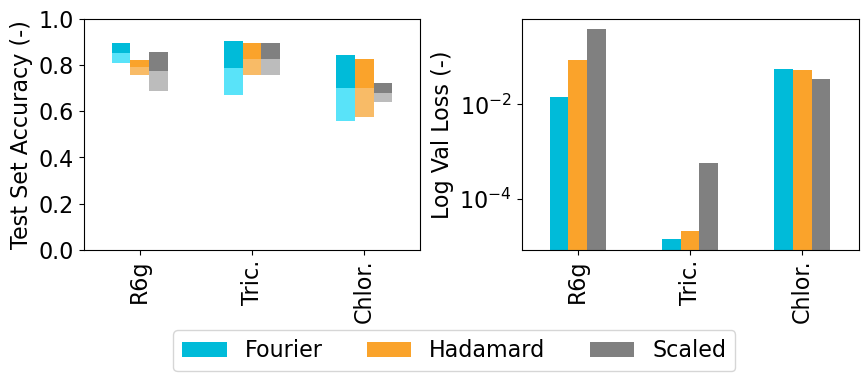

In [10]:
font = {'size'   : 16}

plt.rc('font', **font)

fig4, ax = plt.subplots(1, 2, figsize = [10, 3], sharex = True)

plt.subplots_adjust(wspace= 0.3)

plHigh['Test Acc'].plot.bar(ax = ax[0], color = ['#00BBD9', '#FAA32B', '#808080'], ylim = [0, 1])
plAVG['Test Acc'].plot.bar(ax = ax[0], color = ['#59E3F9', '#F8BB67', '#BCBCBC'], ylim = [0, 1])
plLow['Test Acc'].plot.bar(ax = ax[0], color = ['w', 'w', 'w'], ylim = [0, 1])

ax[0].set_ylabel('Test Set Accuracy (-)')

#plHigh['Val Loss'].plot.bar(ax = ax[1], color = ['#00BBD9', '#FAA32B', '#808080'])
plAVG['Val Loss'].plot.bar(ax = ax[1], color = ['#00BBD9', '#FAA32B', '#808080'])
#plLow['Val Loss'].plot.bar(ax = ax[1], color = ['w', 'w', 'w'])
ax[1].set_ylabel('Log Val Loss (-)') 
ax[1].set_yscale('log')

ax[1].legend(labels = ['Fourier', 'Hadamard','Scaled'], loc=9, ncol = 3, bbox_to_anchor=(-0.2, -0.3))
ax[0].get_legend().remove()


plt.savefig("Tables and Figures/SVG Files/CNN Accuracy Scores.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures/PNG Files/CNN Accuracy Scores.png", format = "png", bbox_inches='tight')

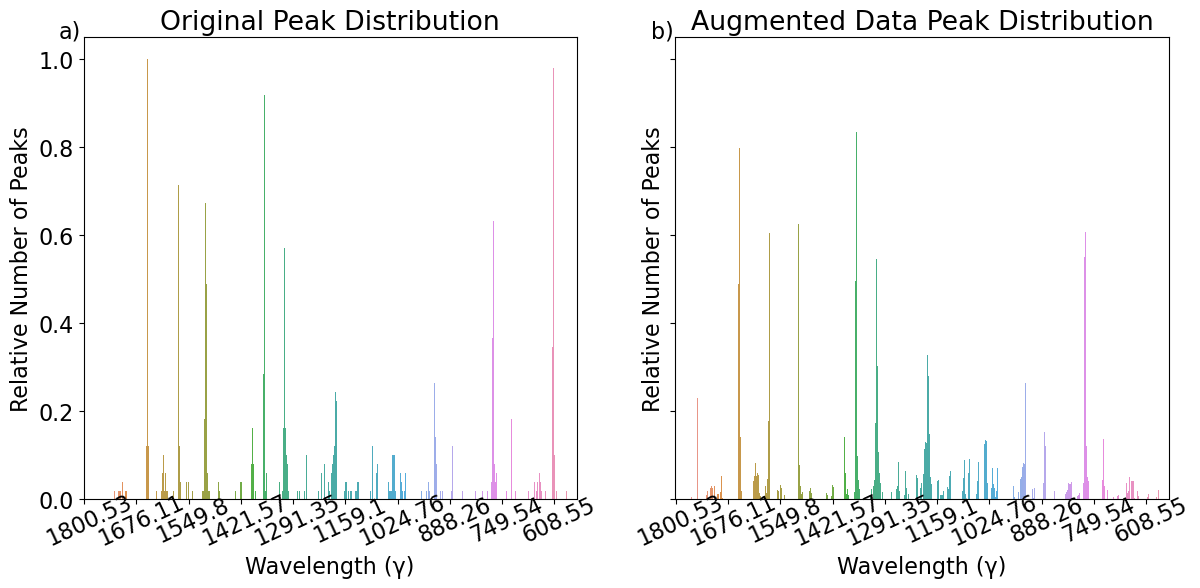

In [11]:
from sklearn.model_selection import train_test_split

#Import Full R6g Dataset
df, labels = me.ConstructCombinedDataset()

[train, test] = train_test_split(df, random_state = 117, shuffle = True, train_size = 0.8)

y_tn = train.index
y_tt = test.index
X_tt = test.to_numpy()
X_tn = train.to_numpy()

#Augment Data to 2000 Spectra
modelabels = np.round(df.columns.to_numpy(), 2)
X_tnAu, y_tnAu = me.AugmentData(X_tn, y_tn, 4000, modelabels, True)
ax = plt.gca()
ax.annotate("a)", xy = (-1.25,1), xycoords = 'axes fraction',annotation_clip = False)
ax.annotate("b)", xy = (-0.05,1), xycoords = 'axes fraction', annotation_clip = False)

plt.savefig("Tables and Figures/SVG Files/Peak Distribution.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures/PNG Files/Peak Distribution.png", format = "png", bbox_inches='tight')